<a href="https://colab.research.google.com/github/tarakantaacharya/Future_location_predictor/blob/main/hackveda_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Feature Engineering on Dataset

In [5]:
import pandas as pd

df_feature = pd.read_csv('feature_matrix.csv',delimiter=",")
df_feature.head()

,Unnamed: 0,Longitude,Latitude,Speed,Distance,Distance_x,Distance_y,PCI,PCI_64,PCI_65,PCI_302
0,0,12.520112,55.780073,21.51,0.553064,-0.004597,-0.003369,64.0,1.0,0.0,0.0
1,1,12.520119,55.780071,20.93,0.553104,-0.004599,-0.003362,64.0,1.0,0.0,0.0
2,2,12.520127,55.780070,20.36,0.553016,-0.004600,-0.003354,64.0,1.0,0.0,0.0
3,3,12.520135,55.780068,19.78,0.553033,-0.004602,-0.003346,64.0,1.0,0.0,0.0
4,4,12.520142,55.780067,19.21,0.552970,-0.004603,-0.003339,64.0,1.0,0.0,0.0


In [6]:
df_output = pd.read_csv('output_matrix.csv',delimiter=",")
df_output.head()

,Unnamed: 0,SINR,RSRP,RSRQ,Power
0,0,16.18,-75.44,-13.36,-55.42
1,1,16.18,-75.44,-13.36,-55.42
2,2,16.18,-75.44,-13.36,-55.42
3,3,16.18,-75.44,-13.36,-55.42
4,4,16.18,-75.44,-13.36,-55.42


In [7]:
df_feature.shape

(29589, 11)

In [8]:
df_output.shape

(31896, 5)

In [9]:
df = pd.concat([df_feature, df_output], axis=1)

In [10]:
df.drop(df.columns[[11]], axis=1, inplace=True)

In [11]:
df.head()

,Longitude,Latitude,Speed,Distance,Distance_x,Distance_y,PCI,PCI_64,PCI_65,PCI_302,SINR,RSRP,RSRQ,Power
0,12.520112,55.780073,21.51,0.553064,-0.004597,-0.003369,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42
1,12.520119,55.780071,20.93,0.553104,-0.004599,-0.003362,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42
2,12.520127,55.780070,20.36,0.553016,-0.004600,-0.003354,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42
3,12.520135,55.780068,19.78,0.553033,-0.004602,-0.003346,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42
4,12.520142,55.780067,19.21,0.552970,-0.004603,-0.003339,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42


In [12]:
# Columns in dataset
# 1.Longitude
# The geographic coordinate specifying the east-west position of a point on Earth.

# 2.Latitude
# The geographic coordinate specifying the north-south position of a point on Earth.

# 3.Speed (in km/h)
# The rate of movement, measured in kilometers per hour.

# 4.Distance (in km)
# The total distance traveled from a starting point, measured in kilometers.

# 5.Distance_x
# The displacement in the x-axis direction (e.g., east-west movement) in a Cartesian coordinate system.

# 6.Distance_y
# The displacement in the y-axis direction (e.g., north-south movement) in a Cartesian coordinate system.

# 7.PCI (Physical Cell Identifier)
# A unique identifier for a cell in a mobile network, typically used in LTE networks.

# 8.PCI_64 (811 MHz base station)
# One-hot encoded representation of a specific Physical Cell Identifier associated with a base station operating at 811 MHz.

# 9.PCI_65 (811 MHz base station)
# Another one-hot encoded PCI value for a base station at 811 MHz.

# 10.PCI_302 (2630 MHz base station)
# One-hot encoded PCI value for a base station operating at 2630 MHz.

# 11.SINR (dB) - Signal-to-Interference-plus-Noise Ratio
# A measure of signal quality, representing the ratio of the desired signal power to the sum of interference and noise powers, in decibels.

# 12.RSRP (dBm) - Reference Signal Received Power
# The average power of LTE reference signals received by the device, measured in decibels relative to a milliwatt.

# 13.RSRQ (dB) - Reference Signal Received Quality
# The ratio of RSRP to the noise and interference power, indicating the quality of the signal.

# 14.Power/RSSI (dBm) - Received Signal Strength Indicator
# A measurement of the total received power, including noise and interference, measured in decibels relative to a milliwatt.


In [13]:
df['time_taken'] = df.apply(
    lambda row: row['Distance'] / row['Speed'] if row['Speed'] != 0 else 1,  # Default 1 minute
    axis=1
)

In [14]:
# Assuming df is your DataFrame
df['speed_change'] = abs(df['Speed'].diff())  # diff() calculates the difference between consecutive values
df['speed_change'] = df['speed_change'].fillna(0)  # Handle the first row where diff() will return NaN

In [15]:
df['time_taken_minutes'] = df['time_taken'] * 60

In [16]:
# Define the initial timestamp
initial_timestamp = pd.to_datetime('2015-01-01 00:00:00')
# Calculate cumulative time in minutes
df['cumulative_time'] = df['time_taken_minutes'].cumsum()  # Cumulative sum of time_taken_minutes
# Add cumulative time to the initial timestamp
df['timestamp'] = initial_timestamp + pd.to_timedelta(df['cumulative_time'], unit='m')

In [17]:
df.head()

,Longitude,Latitude,Speed,Distance,Distance_x,Distance_y,PCI,PCI_64,PCI_65,PCI_302,SINR,RSRP,RSRQ,Power,time_taken,speed_change,time_taken_minutes,cumulative_time,timestamp
0,12.520112,55.780073,21.51,0.553064,-0.004597,-0.003369,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42,0.025712,0.00,1.542718,1.542718,2015-01-01 00:01:32.563084464
1,12.520119,55.780071,20.93,0.553104,-0.004599,-0.003362,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42,0.026426,0.58,1.585581,3.128299,2015-01-01 00:03:07.697944001
2,12.520127,55.780070,20.36,0.553016,-0.004600,-0.003354,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42,0.027162,0.57,1.629714,4.758013,2015-01-01 00:04:45.480798186
3,12.520135,55.780068,19.78,0.553033,-0.004602,-0.003346,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42,0.027959,0.58,1.677551,6.435564,2015-01-01 00:06:26.133857748
4,12.520142,55.780067,19.21,0.552970,-0.004603,-0.003339,64.0,1.0,0.0,0.0,16.18,-75.44,-13.36,-55.42,0.028786,0.57,1.727132,8.162696,2015-01-01 00:08:09.761776344


In [59]:
# Check for missing values
df.isnull().sum()

,0
Longitude,0
Latitude,0
Speed,0
Distance,0
Distance_x,0
Distance_y,0
SINR,0
RSRP,0
RSRQ,0
Power,0


####A future location prediction method based on lightweight LSTM with hyperparamater optimization

In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing the dataset

# Drop columns that are not useful for prediction (optional)
df = df[['Longitude', 'Latitude', 'Speed', 'Distance', 'Distance_x', 'Distance_y',
         'SINR', 'RSRP', 'RSRQ', 'Power', 'timestamp']]

# Handle missing data (optional)
df.fillna(method='ffill', inplace=True)

# Normalize the features
scaler = MinMaxScaler()
df[['Longitude', 'Latitude', 'Speed', 'Distance', 'Distance_x', 'Distance_y', 'SINR', 'RSRP', 'RSRQ', 'Power']] = scaler.fit_transform(
    df[['Longitude', 'Latitude', 'Speed', 'Distance', 'Distance_x', 'Distance_y', 'SINR', 'RSRP', 'RSRQ', 'Power']])

# Create sequences (e.g., past 10 time steps to predict the next)
sequence_length = 10
X = []
y = []

for i in range(sequence_length, len(df)):
    X.append(df.iloc[i-sequence_length:i][['Longitude', 'Latitude', 'Speed', 'Distance', 'Distance_x', 'Distance_y',
                                           'SINR', 'RSRP', 'RSRQ', 'Power']].values)
    y.append(df.iloc[i][['Longitude', 'Latitude']].values)

X = np.array(X)
y = np.array(y)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


<ipython-input-19-f650b3dbf3af>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-19-f650b3dbf3af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)
<ipython-input-19-f650b3dbf3af>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Longitude', 'Latitude', 'Speed', 'Distance', 'Distance_x', 'Distance_y', 'SINR', 'RSRP', 'RSRQ', 'Power']] = scaler.fit_transform(


In [20]:
df

,Longitude,Latitude,Speed,Distance,Distance_x,Distance_y,SINR,RSRP,RSRQ,Power,timestamp
0,0.497570,0.258280,0.373697,0.513681,0.258280,0.497570,0.657148,0.616847,0.968548,0.608272,2015-01-01 00:01:32.563084464
1,0.497995,0.258168,0.363621,0.513718,0.258168,0.497995,0.657148,0.616847,0.968548,0.608272,2015-01-01 00:03:07.697944001
2,0.498481,0.258112,0.353718,0.513636,0.258112,0.498481,0.657148,0.616847,0.968548,0.608272,2015-01-01 00:04:45.480798186
3,0.498967,0.257999,0.343641,0.513652,0.257999,0.498967,0.657148,0.616847,0.968548,0.608272,2015-01-01 00:06:26.133857748
4,0.499392,0.257943,0.333739,0.513593,0.257943,0.499392,0.657148,0.616847,0.968548,0.608272,2015-01-01 00:08:09.761776344
...,...,...,...,...,...,...,...,...,...,...,...
31891,0.963787,0.832154,0.347637,0.634402,0.832154,0.963787,0.448209,0.181200,0.642339,0.227653,2015-11-05 11:33:30.351276347
31892,0.963787,0.832154,0.347637,0.634402,0.832154,0.963787,0.448209,0.181200,0.642339,0.227653,2015-11-05 11:33:30.351276347
31893,0.963787,0.832154,0.347637,0.634402,0.832154,0.963787,0.448209,0.181200,0.642339,0.227653,2015-11-05 11:33:30.351276347
31894,0.963787,0.832154,0.347637,0.634402,0.832154,0.963787,0.448209,0.181200,0.642339,0.227653,2015-11-05 11:33:30.351276347


In [21]:
print(X_train.dtype)
print(y_train.dtype)

float64
object


In [23]:
print(X_train.shape)

(25508, 10, 10)


In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (25508, 10, 10)
y_train shape: (25508, 2)


In [28]:
y_test = y_test.astype(np.float64)
y_train = y_train.astype(np.float64)

In [26]:
y_test.dtype

dtype('float64')

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Model Architecture
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))  # 64 units LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(2))  # Output layer (Longitude, Latitude)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(tf.cast(X_train, dtype=tf.float64),
                    tf.cast(y_train, dtype=tf.float64),
                    epochs=50,
                    batch_size=32,
                    validation_data=(tf.cast(X_test, dtype=tf.float64),
                                     tf.cast(y_test, dtype=tf.float64)))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


798/798 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0181 - val_loss: 6.8694e-04
Epoch 2/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0025 - val_loss: 5.2723e-04
Epoch 3/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0018 - val_loss: 4.6899e-04
Epoch 4/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0014 - val_loss: 3.3929e-04
Epoch 5/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0011 - val_loss: 2.9337e-04
Epoch 6/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8.4661e-04 - val_loss: 2.9886e-04
Epoch 7/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.7217e-04 - val_loss: 2.8617e-04
Epoch 8/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.1479e-04 - val_loss: 4.1567e-04
Epoch 9/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.3670e-04 - val_loss: 2.5921e-04
Epoch 10/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 6.4838e-04 - val_loss: 2.3310e-04
Epoch 11/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.8659e-04 - val_loss: 2.4079

In [31]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.7 MB/s eta 0:00:00


In [32]:
import keras_tuner as kt

# Define the model builder function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(2))  # Output layer for Longitude and Latitude

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 0.0001, 0.01, sampling='log')),
                  loss='mse')
    return model

# Instantiate the tuner
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=50, directory='my_dir')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Trial 90 Complete [00h 03m 50s]
val_loss: 0.00021928345086053014

Best val_loss So Far: 0.00017140897398348898
Total elapsed time: 01h 12m 30s


In [33]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'units': 128, 'dropout': 0.2, 'learning_rate': 0.0006704542648126138, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0069'}


In [34]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          71,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,426 (279.01 KB)

 Trainable params: 71,426 (279.01 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
best_model.save('best_model.keras')

In [47]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict future locations
predictions = model.predict(X_test)

# Show predicted vs actual locations
for i in range(5):  # Show first 5 predictions
    print(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9804e-04
Test Loss: 0.00019199206144548953
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted: [0.31353796 0.41728342], Actual: [0.31455827 0.42292579]
Predicted: [0.31473514 0.41768098], Actual: [0.31480131 0.42286965]
Predicted: [0.31472412 0.41803914], Actual: [0.31504436 0.42286965]
Predicted: [0.31493556 0.41797   ], Actual: [0.3152874  0.42281352]
Predicted: [0.31513333 0.4178887 ], Actual: [0.3155912  0.42281352]


In [46]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('best_model.keras')

# Make predictions
predictions = loaded_model.predict(X_test)
print(predictions)

 36/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.31465587 0.42290372]
 [0.31482834 0.42304057]
 [0.3152486  0.42348304]
 ...
 [0.9670246  0.83013636]
 [0.96715915 0.8302737 ]
 [0.967152   0.83030754]]


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.00019199208985312477
Mean Absolute Error (MAE): 0.005052931378607698


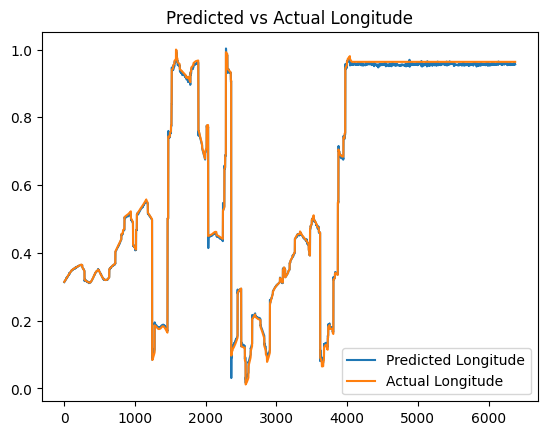

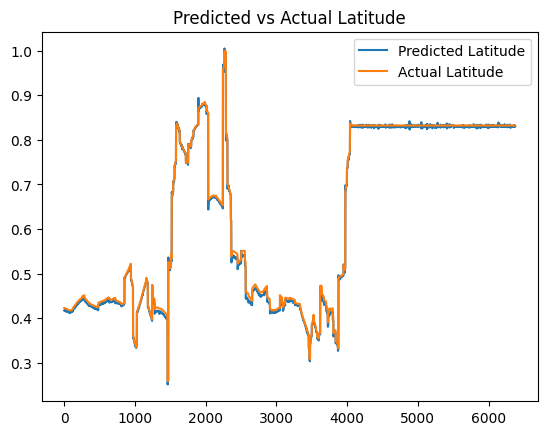

In [49]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for Longitude
plt.plot(predictions[:, 0], label="Predicted Longitude")
plt.plot(y_test[:, 0], label="Actual Longitude")
plt.legend()
plt.title('Predicted vs Actual Longitude')
plt.show()

# Plot predicted vs actual values for Latitude
plt.plot(predictions[:, 1], label="Predicted Latitude")
plt.plot(y_test[:, 1], label="Actual Latitude")
plt.legend()
plt.title('Predicted vs Actual Latitude')
plt.show()


In [58]:
# Example to denormalize predictions
predictions_rescaled = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], X_train.shape[2]-2))], axis=1))[:, :2]
y_test_rescaled = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], X_train.shape[2]-2))], axis=1))[:, :2]
# Show some predictions and compare with actuals
for i in range(5):
    print(f"Predicted (denormalized): {predictions_rescaled[i]}, Actual (denormalized): {y_test_rescaled[i]}")


Predicted (denormalized): [12.51708321 55.78290549], Actual (denormalized): [12.5171   55.783006]
Predicted (denormalized): [12.51710291 55.78291257], Actual (denormalized): [12.517104 55.783005]
Predicted (denormalized): [12.51710273 55.78291895], Actual (denormalized): [12.517108 55.783005]
Predicted (denormalized): [12.51710621 55.78291772], Actual (denormalized): [12.517112 55.783004]
Predicted (denormalized): [12.51710946 55.78291627], Actual (denormalized): [12.517117 55.783004]


####Classic Machine Learning Model to Predict the Location

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Speed', 'Distance', 'SINR', 'RSRP', 'RSRQ', 'Power', 'time_taken', 'speed_change', 'time_taken_minutes', 'PCI_64', 'PCI_65', 'PCI_302']]
y = df[['Longitude', 'Latitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 7.777626624802236e-05
Mean Squared Error: 8.964090056860171e-08
R-squared: 0.9944294798847876


In [ ]:
df_user_input_data = pd.DataFrame()
df_user_input_data

""


In [ ]:
def predict_future_location(input_data):
    predicted_location = model.predict(input_data)
    global df_user_input_data
    df_user_input_data = pd.concat([df_user_input_data, input_data], ignore_index=True)
    return predicted_location[0]

user_choice = 1
previous_speed = 0
while(user_choice!=0) :
  speed = float(input("Speed in km/h:"))
  distance = float(input("Distance in km:"))
  print('Signal-to-Interference-plus-Noise Ratio (SINR)')
  SINR = float(input("SINR in dB:"))
  print('Reference Signal Received Power (RSRP)')
  RSRP = float(input("RSRP in dBm:"))
  print('Reference Signal Received Quality (RSRQ)')
  RSRQ = float(input("RSRQ in dB:"))
  Power = float(input("Power in dBm:"))
  time_taken = float(input("Time taken in hours:"))
  time_taken_minutes = time_taken * 60

  print(f"Previous speed : {previous_speed}")
  # Calculate speed change (current speed - previous speed)
  speed_change = abs(speed - previous_speed)  # For first prediction, speed_change will be same as current speed
  previous_speed = speed  # Update previous speed for the next prediction

  Physical_Cell_Identifier = int(input("Enter the number for selected PCI (64, 65, or 302): "))
  if Physical_Cell_Identifier == 64:
      PCI_64, PCI_65, PCI_302 = 1, 0, 0
  elif Physical_Cell_Identifier == 65:
      PCI_64, PCI_65, PCI_302 = 0, 1, 0
  elif Physical_Cell_Identifier == 302:
      PCI_64, PCI_65, PCI_302 = 0, 0, 1
  else:
      print("Invalid PCI selection, defaulting PCI_64 to 1")
      PCI_64, PCI_65, PCI_302 = 1, 0, 0

  input_data = pd.DataFrame({
        'Speed': [speed],
        'Distance': [distance],
        'SINR': [SINR],
        'RSRP': [RSRP],
        'RSRQ': [RSRQ],
        'Power': [Power],
        'time_taken': [time_taken],
        'speed_change': [speed_change],
        'time_taken_minutes': [time_taken_minutes],
        'PCI_64': [PCI_64],
        'PCI_65': [PCI_65],
        'PCI_302': [PCI_302]
    })

  predicted_location = predict_future_location(input_data)
  # Display predicted longitude and latitude
  print(f"Predicted Future Location: Longitude: {predicted_location[0]}, Latitude: {predicted_location[1]}")
  user_choice = int(input("Enter 1 to continue or 0 to exit: "))
  if user_choice == 0:
    break


Speed in km/h:25
Distance in km:0.8
Signal-to-Interference-plus-Noise Ratio (SINR)
SINR in dB:-34
Reference Signal Received Power (RSRP)
RSRP in dBm:-23
Reference Signal Received Quality (RSRQ)
RSRQ in dB:-50
Power in dBm:21
Time taken in hours:0.02
Previous speed : 0
Enter the number for selected PCI (64, 65, or 302): 65
Predicted Future Location: Longitude: 12.51453557833334, Latitude: 55.78485058000002
Enter 1 to continue or 0 to exit: 0


In [ ]:
df_user_input_data

,Speed,Distance,SINR,RSRP,RSRQ,Power,time_taken,speed_change,time_taken_minutes,PCI_64,PCI_65,PCI_302
0,25.0,0.8,-34.0,-23.0,-50.0,21.0,0.02,25.0,1.2,0,1,0
